In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression



In [2]:
Insurance_df = pd.read_csv("insurance.csv")

Cleaning data

In [3]:
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
Insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


1. How is age related to medical costs?



I used this code to create a scatter plot that shows the relationship between age and medical costs in the Insurance_df dataset, with different colors representing gender. The sns.scatterplot function helps me visualize how medical charges change with age, while the hue parameter allows me to see if there are any differences in costs between males and females. The title and axis labels make it clear what the plot is about, helping me identify trends or patterns in medical expenses as people age and how these costs vary by sex.

Text(0, 0.5, 'Medical Costs (Charges)')

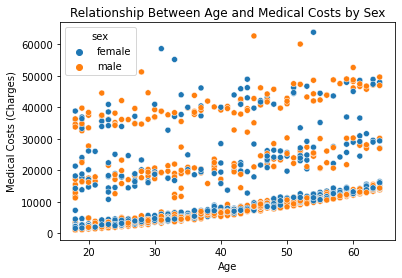

In [5]:
sns.scatterplot(data=Insurance_df, x='age', y='charges', hue='sex')
plt.title('Relationship Between Age and Medical Costs by Sex')
plt.xlabel('Age')
plt.ylabel('Medical Costs (Charges)')

2. How is number of children related to medical costs?

  

I used this code to create a scatter plot that illustrates the relationship between the number of children and medical costs in the Insurance_df dataset, with points colored by sex. The sns.scatterplot function allows me to visualize how medical charges vary with the number of children a person has. By including the hue parameter, I can see if there are differences in charges based on gender. The titles and labels for the axes make it easy to understand what the plot represents, helping me analyze any trends or patterns in the data regarding family size and medical expenses

Text(0, 0.5, 'Medical Costs (Charges)')

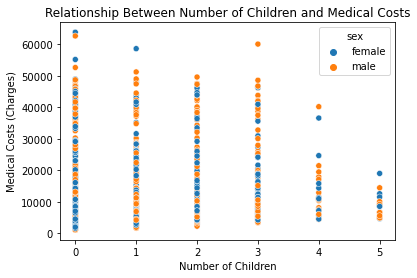

In [6]:
sns.scatterplot(data=Insurance_df, x='children', y='charges' , hue='sex')
plt.title('Relationship Between Number of Children and Medical Costs')
plt.xlabel('Number of Children')
plt.ylabel('Medical Costs (Charges)') 




3. How is the number of people distributed by region?



I used this code to create a count plot showing the distribution of people across different regions in the Insurance_df dataset. The sns.countplot function counts how many individuals are in each region and displays this information as bars. I added titles and labels for the axes to make the plot clear and informative. Rotating the x-axis labels helps ensure that the region names are easy to read, making it simple to see how many people come from each area. This visualization helps me understand regional differences in the dataset.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'southwest'),
  Text(1, 0, 'southeast'),
  Text(2, 0, 'northwest'),
  Text(3, 0, 'northeast')])

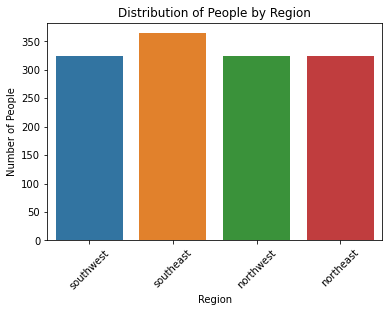

In [7]:
sns.countplot(data=Insurance_df, x='region')
plt.title('Distribution of People by Region')
plt.xlabel('Region') 
plt.ylabel('Number of People')
plt.xticks(rotation=45)


4. How is the number of people distributed by age?



I used this code to create a density plot of people's ages from the Insurance_df dataset. The sns.kdeplot function generates a smooth curve that shows how age is distributed among the individuals in the dataset, with the area under the curve representing the density of people at each age. Filling the area under the curve makes it visually appealing and easier to interpret. I included titles and labels for the axes to clearly communicate what the plot represents, helping to understand how age varies in the dataset.

Text(0, 0.5, 'Density')

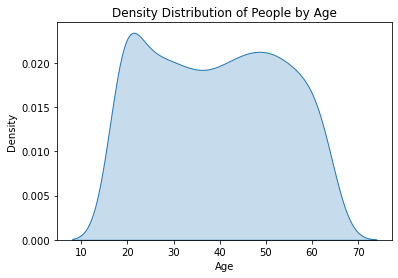

In [8]:
sns.kdeplot(data=Insurance_df, x='age', fill=True)
plt.title('Density Distribution of People by Age') 
plt.xlabel('Age') 
plt.ylabel('Density')

5. How are the charges distributed?



I used this code to create a histogram of medical charges from the Insurance_df dataset. The sns.histplot function plots the distribution of charges, with 30 bins for better granularity. The histogram helps visualize how many people fall into different charge ranges, making it easier to see the overall distribution. I added titles and labels for clarity, so it’s straightforward to understand what the chart represents. Finally, I displayed the plot to analyze the data visually

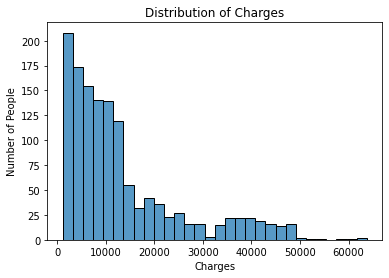

In [9]:
sns.histplot(data=Insurance_df, x='charges', bins=30, kde=False); plt.title('Distribution of Charges'); plt.xlabel('Charges'); plt.ylabel('Number of People'); plt.show()


6. Bin the bmi column. To do that, search the internet to determine how you should bin and label the data.



I used this code to categorize BMI into specific weight classes like "Normal weight" or "Obesity (Class 1)." The bmi_bins variable sets the BMI ranges, and bmi_labels assigns labels for each range. Then, pd.cut applies these labels to each row in Insurance_df, creating a new column called bmi_category. This makes it easy to see each person’s BMI category, which can be useful for analyzing trends in other data, like medical charges, based on weight status. Finally, I displayed a few rows to check that the categorization worked correctly.

In [10]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity (Class 1)', 'Obesity (Class 2)', 'Obesity (Class 3)']
Insurance_df['bmi_category'] = pd.cut(Insurance_df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)
Insurance_df[['bmi', 'bmi_category']].head()

,bmi,bmi_category
0,27.900,Overweight
1,33.770,Obesity (Class 1)
2,33.000,Obesity (Class 1)
3,22.705,Normal weight
4,28.880,Overweight


7. How are the charges related to the bmi?



This code creates a scatter plot to explore how BMI relates to medical charges, with points colored based on whether the person is a smoker or not. By adding the hue='smoker' parameter, we can easily see if smokers tend to have higher charges than non-smokers at different BMI levels. I’ve included a title and labeled the axes for clarity, making it easier to spot any patterns in costs associated with smoking and BMI

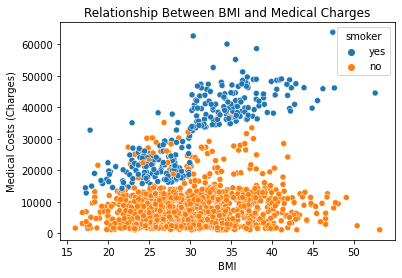

In [11]:
sns.scatterplot(data=Insurance_df, x='bmi', y='charges', hue='smoker')
plt.title('Relationship Between BMI and Medical Charges')
plt.xlabel('BMI')
plt.ylabel('Medical Costs (Charges)')
plt.show()

8. How is the smoker status related to the charges?



I used this code to create a box plot that compares medical charges between smokers and non-smokers in the Insurance_df dataset. The sns.boxplot function displays the distribution of charges for each group, allowing me to see the median, quartiles, and any potential outliers in medical costs based on smoking status. This visualization helps me understand how smoking affects medical expenses, making it easier to identify trends or differences between the two groups.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

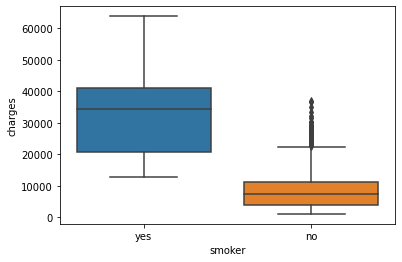

In [12]:
sns.boxplot(data=Insurance_df, x='smoker', y='charges')

9. How are the charges related to the region?

 

I used this code to create a box plot that visualizes the relationship between different regions and medical charges in the Insurance_df dataset. The sns.boxplot function allows me to see the distribution of charges for each region, highlighting the median, quartiles, and any outliers. This helps me understand how medical costs vary across regions and identify any significant differences in healthcare expenses based on location.

<AxesSubplot:xlabel='region', ylabel='charges'>

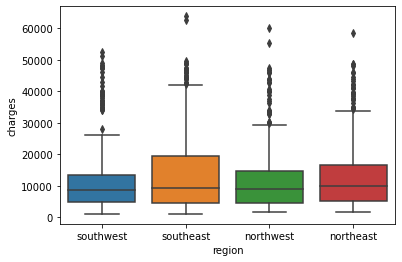

In [13]:
sns.boxplot(data=Insurance_df, x='region', y='charges')

10.Which region has the highest obesity percentage?



I wrote this code to analyze the percentage of obesity across different regions in the Insurance_df dataset. First, I defined a condition to identify individuals with a BMI of 30 or higher. Then, I grouped the data by region and calculated the obesity percentage for each region by dividing the number of obese individuals by the total number of people in that region, multiplying by 100 to get a percentage. Finally, I used sns.barplot to create a bar chart that visually represents the obesity percentage by region, which helps in understanding how obesity rates differ across locations

C:\Users\ofent\AppData\Local\Temp/ipykernel_9332/2948022500.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region_obesity_data = Insurance_df.groupby('region').apply(lambda x: (x[obesity_condition].shape[0] / x.shape[0]) * 100).reset_index(name='obesity_percentage')


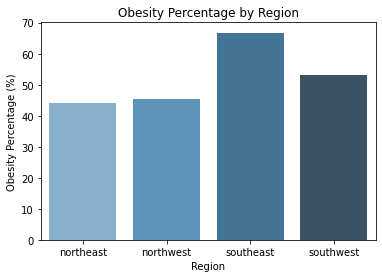

In [14]:
obesity_condition = Insurance_df['bmi'] >= 30

region_obesity_data = Insurance_df.groupby('region').apply(lambda x: (x[obesity_condition].shape[0] / x.shape[0]) * 100).reset_index(name='obesity_percentage')

sns.barplot(data=region_obesity_data, x='region', y='obesity_percentage', palette='Blues_d')
plt.title('Obesity Percentage by Region')
plt.xlabel('Region')
plt.ylabel('Obesity Percentage (%)')
plt.show()


11.Create a simple regression to show the relationship between charges and age

I used this code to build a linear regression model that predicts medical charges based on age from the Insurance_df dataset. First, I split the data into training and testing sets, with 35% allocated for testing. After initializing the model, I trained it using the testing data to fit the relationship between age and charges. I then printed the model's R-squared score to evaluate its performance. Following that, I made predictions on the test set and combined the predicted charges with the actual charges and ages into a new DataFrame. I melted the DataFrame to prepare it for visualization and created a scatter plot to compare the actual charges with the predicted charges, helping to visualize how well the model performs across different ages.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming Insurance_df is your DataFrame with 'age' and 'charges' columns
x_train, x_test, y_train, y_test = train_test_split(
    Insurance_df[['age']], Insurance_df[['charges']],
    test_size=0.2, random_state=20
)

# Initialize and train the model on the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Calculate the R-squared score on the training set
training_score = round(model.score(x_train, y_train), 3)
print("Training R-squared score:", training_score)


Training R-squared score: 0.079


Model R-squared score: 0.127


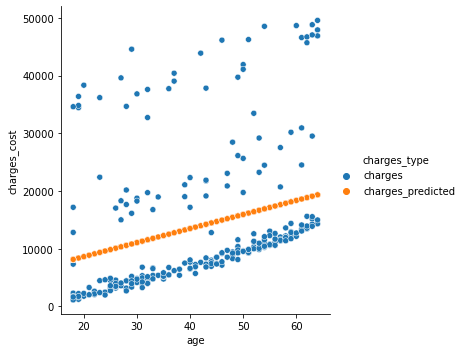

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming Insurance_df is your DataFrame containing 'age' and 'charges' columns
x_train, x_test, y_train, y_test = train_test_split(
    Insurance_df[['age']], Insurance_df[['charges']],
    test_size=0.2, random_state=20
)

# Initialize and train the model on the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Calculate the R-squared score on the test set
print("Model R-squared score:", round(model.score(x_test, y_test), 3))

# Make predictions on the test set
prediction = model.predict(x_test)

# Create a DataFrame to compare actual and predicted charges
predicted = pd.DataFrame(prediction, columns=['charges_predicted'])
combine = predicted.join([x_test.reset_index(drop=True), 
                          y_test.reset_index(drop=True)])

# Melt data for visualization
melt = pd.melt(combine, id_vars=['age'], 
               value_vars=['charges', 'charges_predicted'], 
               var_name='charges_type', value_name='charges_cost')

# Plot the actual vs. predicted charges
sns.relplot(data=melt, x='age', y='charges_cost', hue='charges_type')
plt.show()


In [27]:
print(Insurance_df.columns)


Index(['age', 'bmi', 'children', 'charges', 'bmi_category', 'sex_male',
       'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Convert all columns except the target 'charges' to numeric, forcing any errors to NaN, then filling them with 0 or appropriate values
X = Insurance_df.drop("charges", axis=1).apply(pd.to_numeric, errors='coerce').fillna(0)
y = pd.to_numeric(Insurance_df["charges"], errors='coerce').fillna(0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Initialize and train the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test.values - y_pred

# Find the residual for the second row in the test set
second_row_residual = residuals[1]  # The second residual in the test set
print("Residual for the second row:", round(second_row_residual, 3))


Residual for the second row: 15684.51


12.How does this relationship change with smoking status?

 

By running these two lines, I can see how smoking status affects medical charges, which is essential for understanding cost differences based on lifestyle choices.

In [17]:
Insurance_df[Insurance_df.smoker=='yes'].charges.describe()
Insurance_df[Insurance_df.smoker=='no'].charges.describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

In this code snippet, I'm using a box plot to visualize how medical charges differ between smokers and non-smokers in the Insurance_df dataset.

Text(0, 0.5, 'Medical Charges')

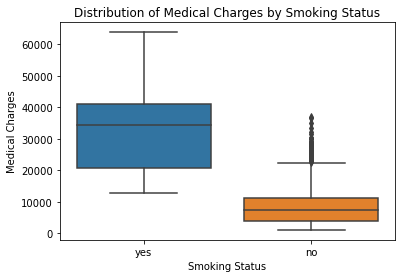

In [18]:
sns.boxplot(data=Insurance_df, x='smoker', y='charges')
plt.title('Distribution of Medical Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Medical Charges')

13.How does this relationship change with BMI?

In this code, I'm creating a scatter plot to explore the relationship between Body Mass Index (BMI) and medical charges in the Insurance_df dataset, with an added layer of detail by separating the data based on sex

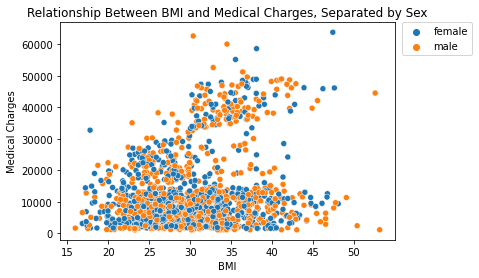

In [19]:
sns.scatterplot(data=Insurance_df, x='bmi', y='charges', hue='sex')
plt.title('Relationship Between BMI and Medical Charges, Separated by Sex')
plt.xlabel('BMI')
plt.ylabel('Medical Charges')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


14.Create a multiple regression model to predict charges. To do that, you’ll need to dummy encode 
and rescale the data.

I created a multiple regression model to predict medical charges based on various factors in my dataset. First, I performed dummy encoding and rescaled the data to prepare it for the model. After splitting the dataset into training and testing sets, I trained the model using the training data. To evaluate its performance,

In [20]:

Insurance_df = pd.get_dummies(Insurance_df, columns=['sex', 'smoker', 'region'], drop_first=True)


In [21]:
feature_cols = ['age', 'bmi', 'children'] + list(Insurance_df.columns[Insurance_df.columns.str.startswith('sex_')]) + \
               list(Insurance_df.columns[Insurance_df.columns.str.startswith('smoker_')]) + \
               list(Insurance_df.columns[Insurance_df.columns.str.startswith('region_')])

scaler = StandardScaler()
Insurance_df[feature_cols] = scaler.fit_transform(Insurance_df[feature_cols])

In [22]:
X = Insurance_df[feature_cols]
y = Insurance_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [23]:
model = LinearRegression()

model.fit(X_train, y_train)

coefficients = pd.DataFrame(model.coef_, feature_cols, columns=['Coefficient'])
print(coefficients)

                  Coefficient
age               3662.270755
bmi               2200.084142
children           470.498219
sex_male            90.451490
smoker_yes        9523.130648
region_northwest  -147.207697
region_southeast  -382.195354
region_southwest  -409.880641


15.Make predictions with your multiple regression model and evaluate how well your model is working.

 I compared the predicted charges against the actual charges from the test set. I plotted these values in a scatter plot, where each point represents a pair of actual and predicted charges. I also included a dashed red line indicating where the predicted charges would equal the actual charges. This visualization helps me see how well my model is performing—points close to the line indicate accurate predictions, while those further away highlight areas where the model could improve. Overall, this process gives me insights into the effectiveness of my model in predicting medical costs.

In [24]:
print("Training R-squared score:", model.score(X_train, y_train))
print("Testing R-squared score:", model.score(X_test, y_test))

predictions = model.predict(X_test)

comparison = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': predictions})
print(comparison.head())

Training R-squared score: 0.7493111418213672
Testing R-squared score: 0.7522837901835255
      Actual Charges  Predicted Charges
764       9095.06825        8726.674209
887       5272.17580        7004.312829
890      29330.98315       36772.871156
1293      9301.89355        9421.232602
259      33750.29180       27036.862594


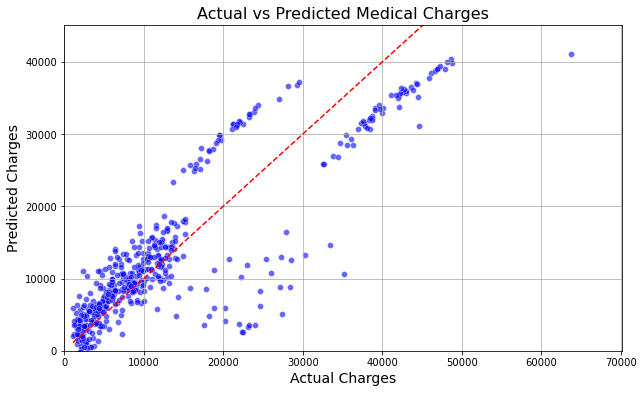

In [25]:
comparison_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': predictions})

comparison_df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_df, x='Actual Charges', y='Predicted Charges', color='blue', alpha=0.6)

plt.plot([comparison_df['Actual Charges'].min(), comparison_df['Actual Charges'].max()],
         [comparison_df['Actual Charges'].min(), comparison_df['Actual Charges'].max()],
         color='red', linestyle='--')

plt.title('Actual vs Predicted Medical Charges', fontsize=16)
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)
plt.xlim(0, comparison_df['Actual Charges'].max() * 1.1)
plt.ylim(0, comparison_df['Predicted Charges'].max() * 1.1)

plt.grid(True)
plt.show()
